## Lendo o dataset

In [16]:
from pathlib import Path

from projeto.dataset import read_dataset

base_path = Path.cwd()
df = read_dataset(base_path)

---

## Análise exploratória preliminar

Rode o código abaixo e responda:

- Todas as colunas estão de acordo com seus respectivos nomes?
- Existem dados faltantes?
- Para as variáveis contínuas: existem outliers ou anomalias?
- Para as variáveis categóricas: existem situações de desbalanceamento severo de classes?

***Respostas:***

1. Analisando os 5 primeiros exemplos mostrados pela função _describe_head() e os gráficos de distribuição gerados, todas features apresentam valores respectivos ao seu nome, tendo o detalhe de que as features capital.gain e capital.loss apresentam valores suspeitos 

2. Sim, há dados faltantes nas features workclass(1836), occupation(1843) e native.country(583), sendo todas elas features do tipo categóricas/qualitativas

3. Usando a função analisador_outlier_num()(Função que está no arquivo funcoes_extras.py) e analisando os gráficos obtidos por run_univariate_EDA(), foi avistado que as features/variáveis contínuas possuem outliers

4. Analisando os gráficos obtidos por run_univariate_EDA(), concluí que ocorre sim situações de desbalanceamento severo de classes, um exemplo é no gráfico de education-level distribuition, que mostra a categoria HS-Grade estando muito maior que outras categorias



---

# Univariate EDA
---


## Descriptive Analysis

### Data Types

age                  int64
workclass         category
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
capital.gain       float64
capital.loss       float64
hours.per.week       int64
native.country    category
income            category
dtype: object

### Missing Values

workclass         1836
occupation        1843
native.country     583
dtype: int64

### Dataframe Size

Number of rows: 32561

Number of columns: 14

### First 5 Rows of the Dataframe

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0.0,4356.0,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0.0,4356.0,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40,United-States,<=50K


### Statistical Summary

#### Continuous Variables

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.58,13.64,17.0,28.0,37.0,48.0,90.0
education.num,32561.0,10.08,2.57,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.65,7385.29,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.30,402.96,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.44,12.35,1.0,40.0,40.0,45.0,99.0


#### Categorical Variables

,count,unique,top,freq
workclass,30725,8,Private,22696
education,32561,16,HS-grad,10501
marital.status,32561,7,Married-civ-spouse,14976
occupation,30718,14,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native.country,31978,41,United-States,29170
income,32561,2,<=50K,24720


---


## Visualizations

### Age Distribution

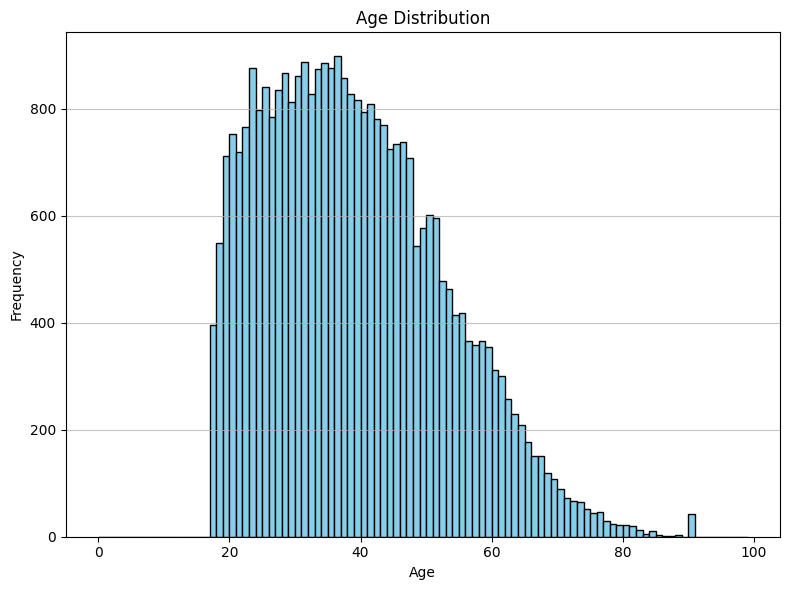

### Education Level Distribution

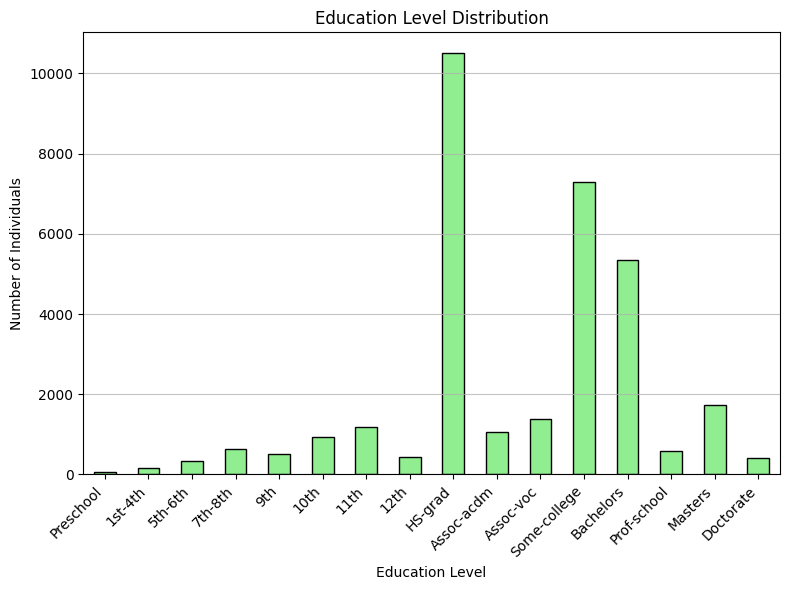

### Education Number Distribution

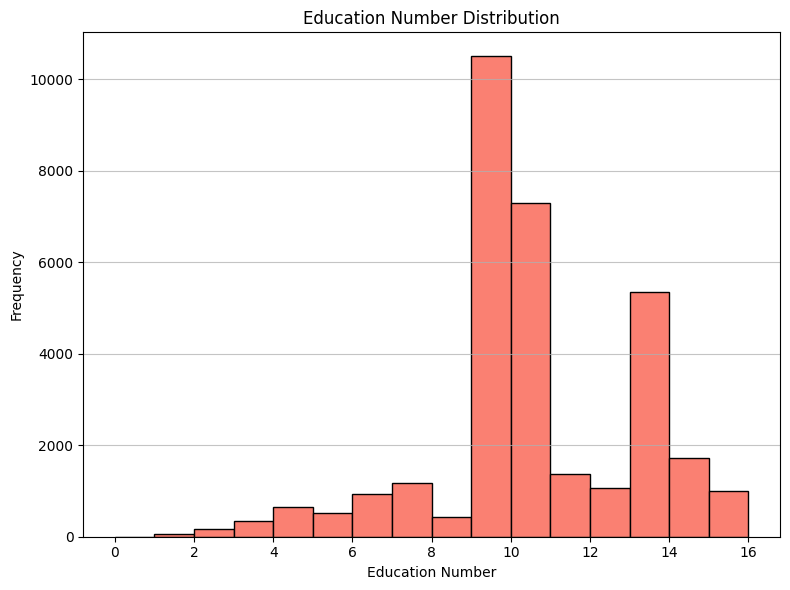

### Marital Status Distribution

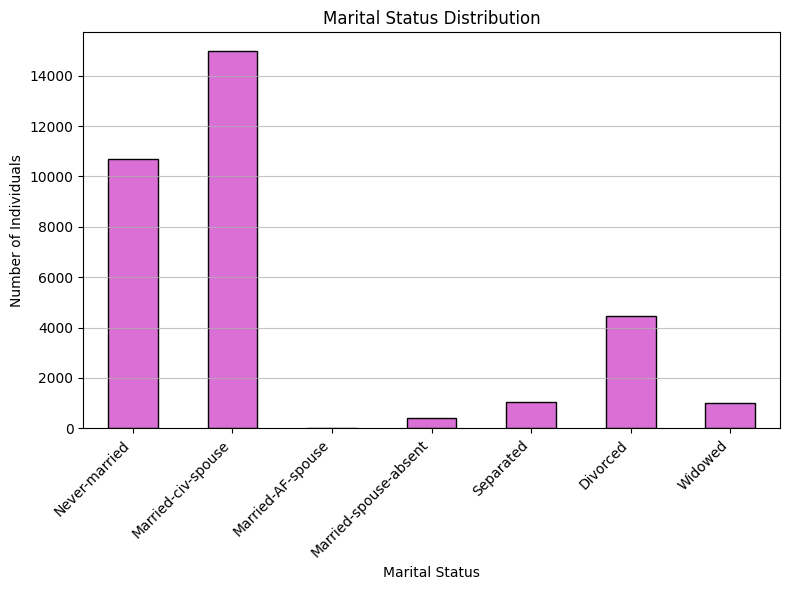

### Occupation Distribution

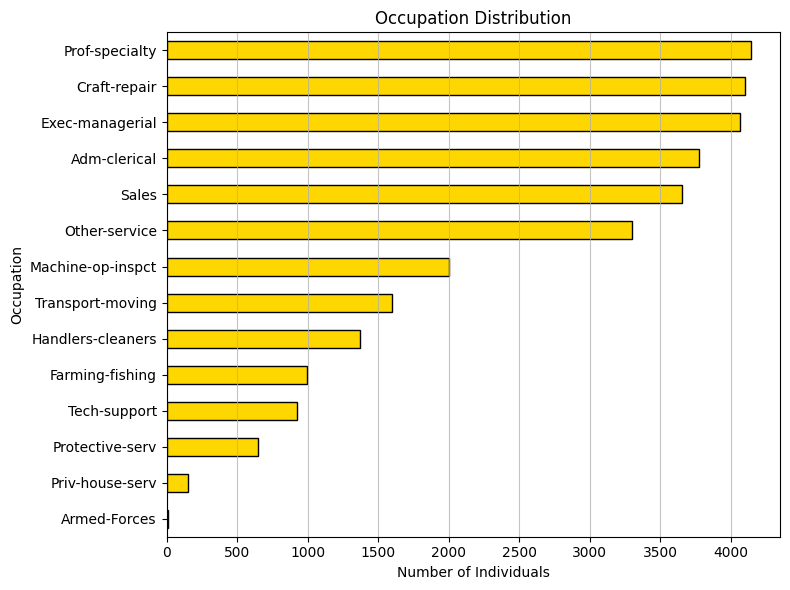

### Relationship Distribution

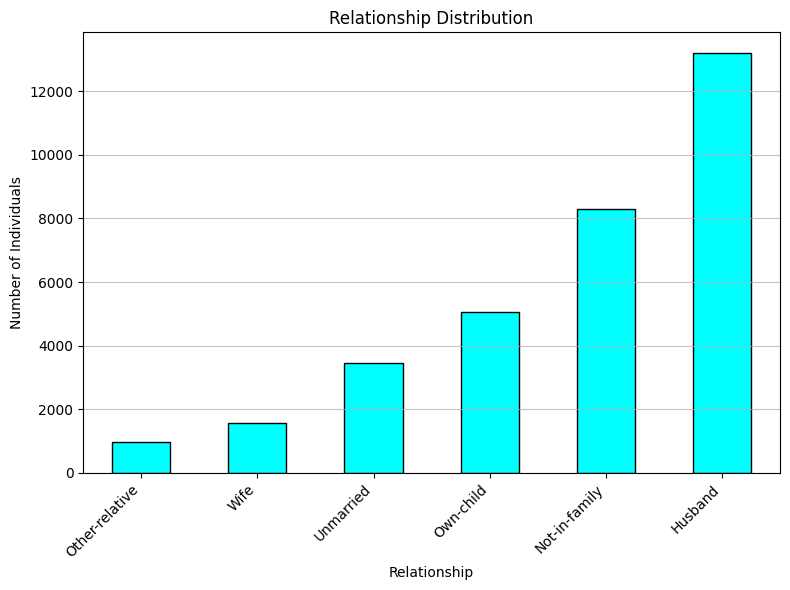

### Race Distribution

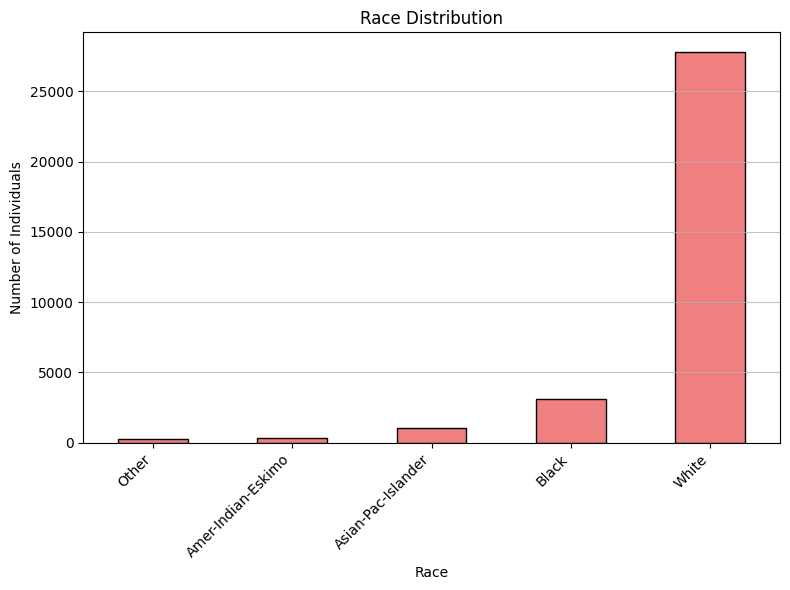

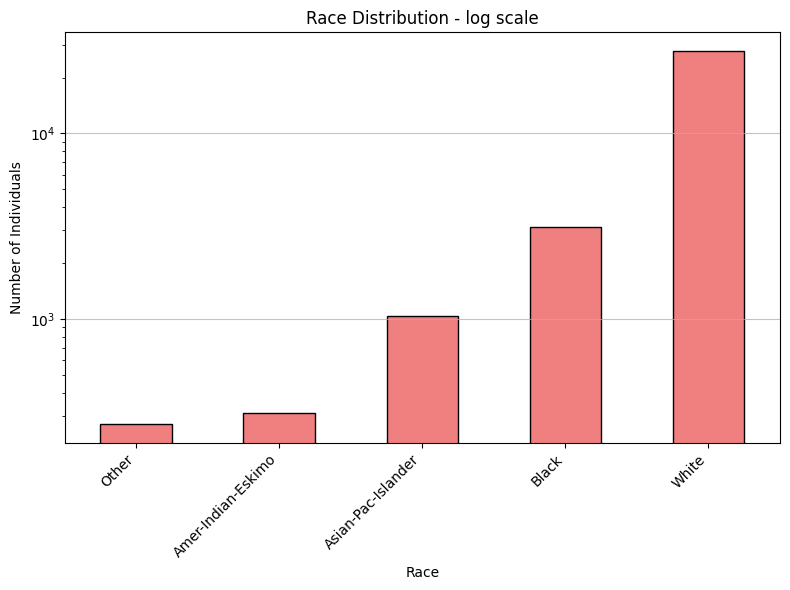

### Sex Distribution

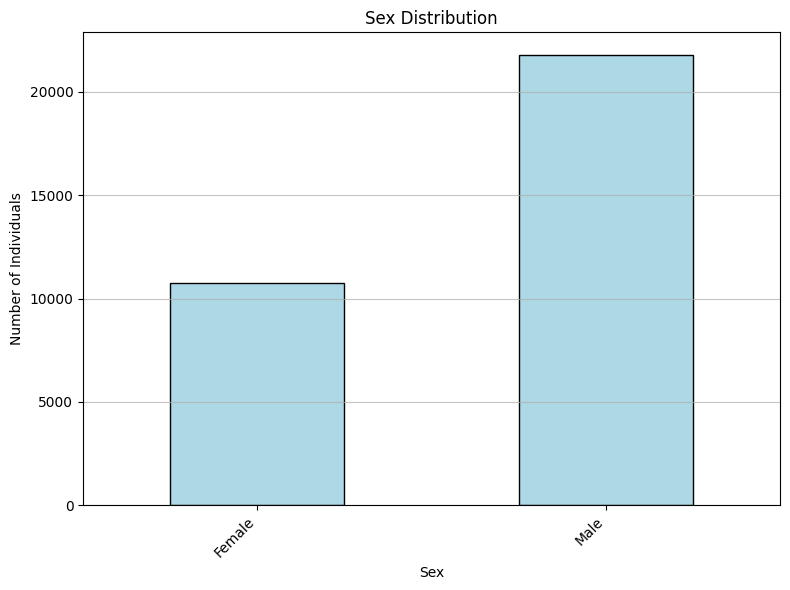

### Capital Gain Distribution

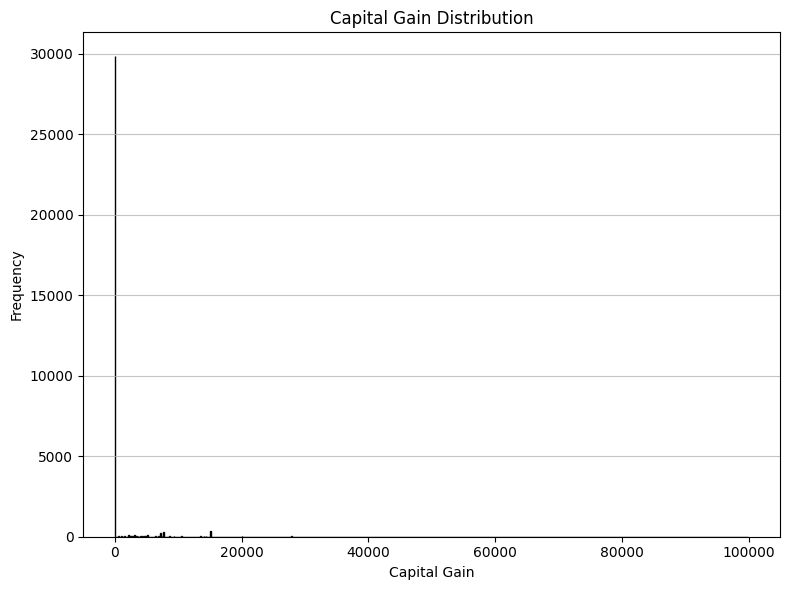

### Capital Loss Distribution

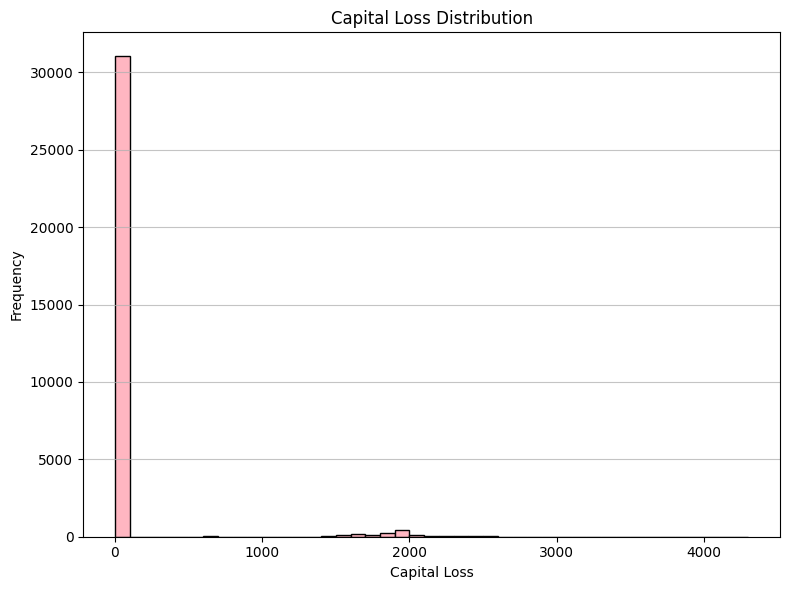

### Hours Per Week Distribution

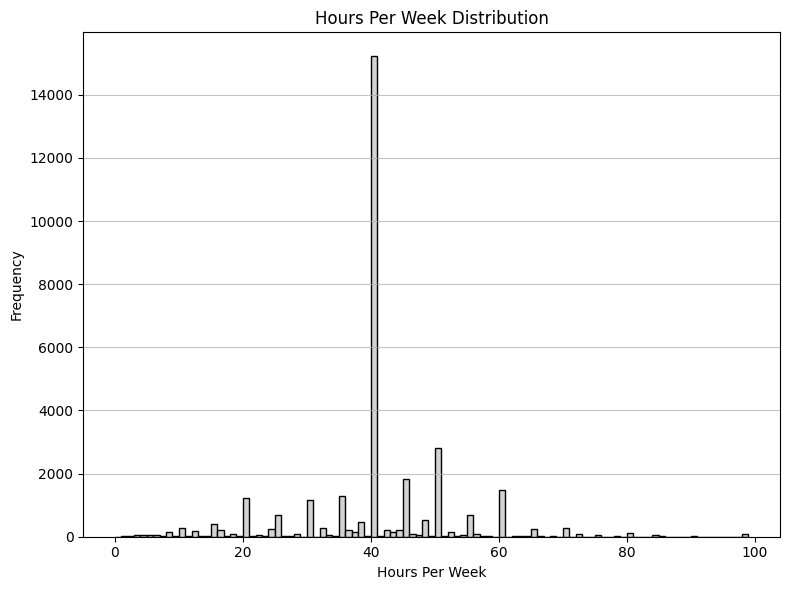

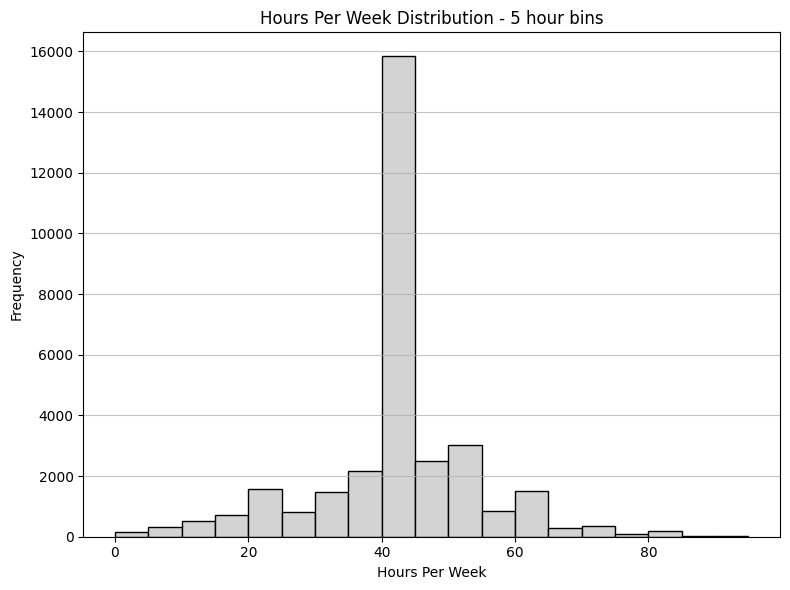

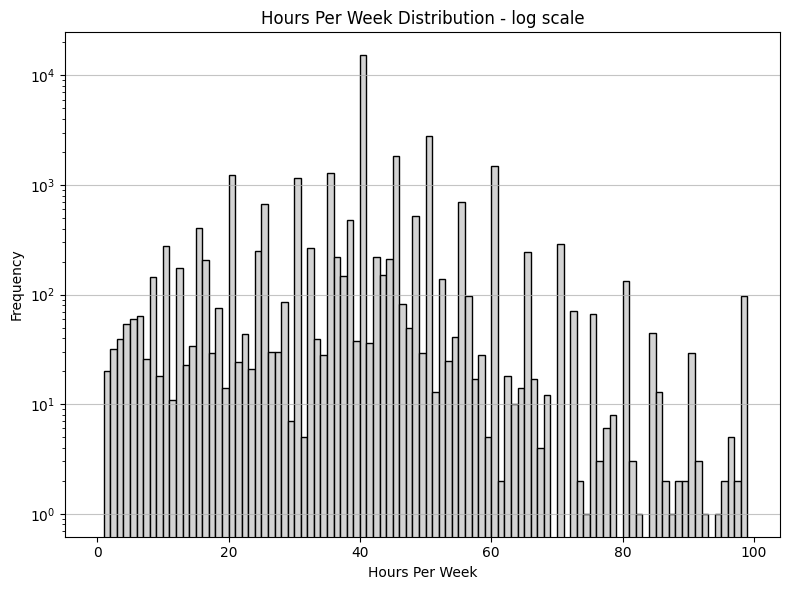

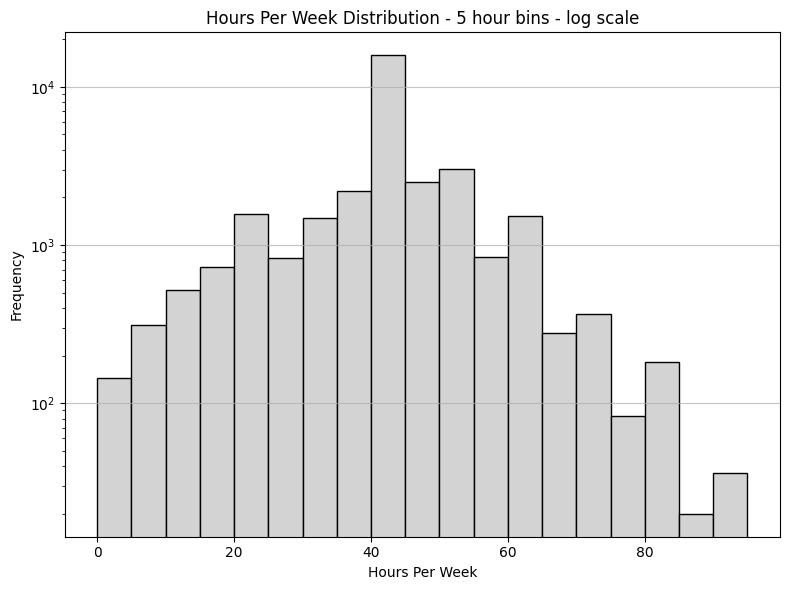

### Native Country Distribution

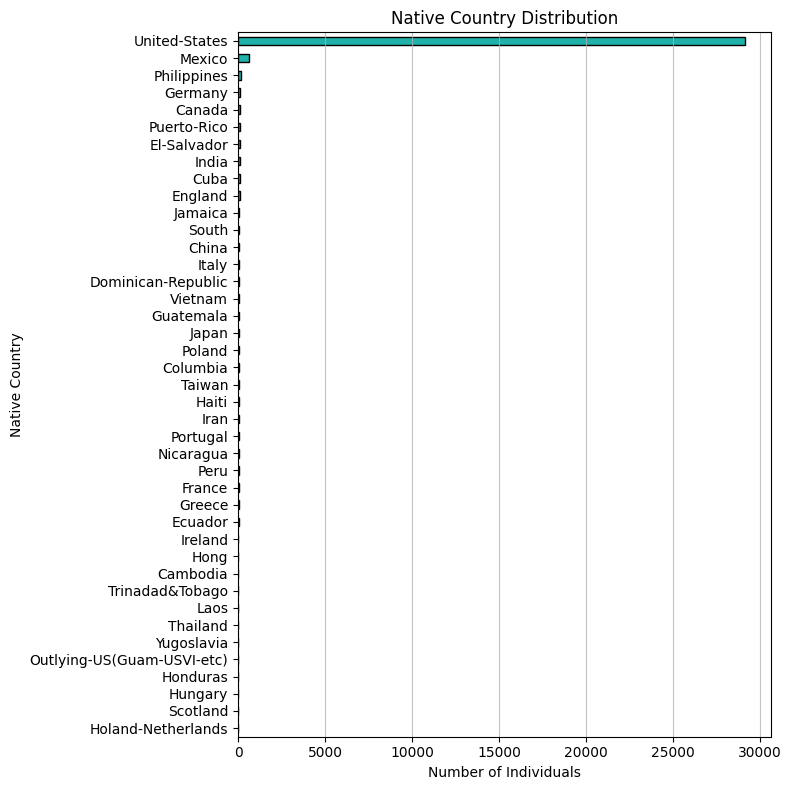

### Income Distribution

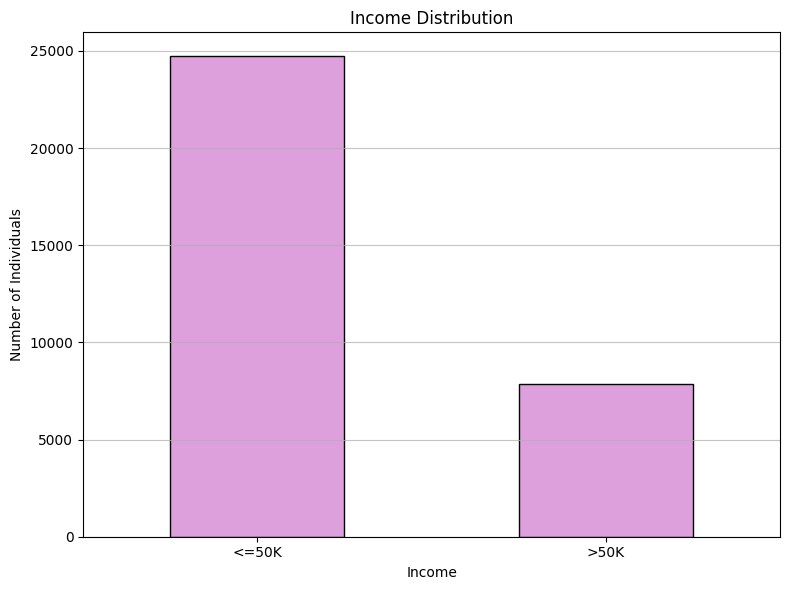

In [17]:
from projeto.eda import run_univariate_EDA

run_univariate_EDA(df)

## Filtragem e pré-processamento do dataset

Execute o código abaixo: 

In [18]:
import pandas as pd


def cut_non_americans(df: pd.DataFrame) -> pd.DataFrame:
    df = df[df['native.country'] == 'United-States']
    df = df.drop(columns=['native.country'])
    return df

df = cut_non_americans(df)

Responda: qual o motivo para fazer este procedimento?

***Resposta***:

Por 'native.country' ser uma feature de pouca importância e influência, mas que possui dados faltantes, excluímos ela do dataset para evitar erros em relação à falta de dados e impactos negativos no processo de treino do modelo, além disso, o modelo pode acabar se tornando enviesado devido à frequência do número de exemplos com 'native.country' = 'United-States' ser muito maior em relação à outros, o que poderia causar overfitting, por isso, antes de excluir a coluna, mantemos os exemplos que possuem 'native.country' = 'United-States':

{'United-States': 29170, nan: 583, 'Mexico': 643, 'Greece': 29,

'Vietnam': 67, 'China': 75, 'Taiwan': 51, 'India': 100,

'Philippines': 198, 'Trinadad&Tobago': 19, 'Canada': 121,

'South': 80, 'Holand-Netherlands': 1, 'Puerto-Rico': 114,

'Poland': 60, 'Iran': 43, 'England': 90, 'Germany': 137, 'Italy': 73,

'Japan': 62, 'Hong': 20, 'Honduras': 13, 'Cuba': 95, 'Ireland': 24, 'Cambodia': 19,

'Peru': 31, 'Nicaragua': 34, 'Dominican-Republic': 70, 'Haiti': 44, 'El-Salvador': 106,

'Hungary': 13, 'Columbia': 59, 'Guatemala': 64, 'Jamaica': 81, 'Ecuador': 28,

'France': 29, 'Yugoslavia': 16, 'Scotland': 12, 'Portugal': 37, 'Laos': 18, 'Thailand': 18, 'Outlying-US(Guam-USVI-etc)': 14}

## Separação treino-teste

In [19]:
X = df.drop(columns=['income'])
y = df['income']

In [20]:
from projeto.config import RANDOM_SEED, TEST_SIZE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_SEED,
)

## Análise pós-separação treino-teste

Nem todos os pares de colunas merecem uma análise conjunta detalhada, isso rapidamente foge ao controle. Vamos privilegiar inicialmente:

- Análise descritiva:

    - Correlação entre *features* para identificar possiveis colinearidades simples e outras redundâncias de informação:

        - Entre *features* numéricas: correlação (e.g. Pearson)

        - Entre *features* categóricas: coeficiente de associação (e.g. [coeficiente V de Cramer](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V))

        - Entre uma *feature* categórica e uma contínua: podemos *discretizar* a *feature* contínua por quantis e tratar esse problema como sendo um problema de associação entre categóricas, mas é meio gambiarra isso... paciencia. 

    - Correlação entre *target* e *features*, para identificar possíveis *features* que sejam:
    
        - Perfeitamente preditoras do target: isso é um sinal de que o *target* e a *feature* são a mesma coisa, e fazer um projeto de *machine learning* para prever $y$ à partir de... $y$ (!) é obviamente perda de tempo e dinheiro.

        - Totalmente não-correlacionadas com o target: *TALVEZ* indique que a *feature* em questão é inútil, mas isso nem sempre é verdade. Pode ser que a *feature* tem o seu valor preditivo apenas quando combinada com outras features. Pode ser que esta *feature* tenha um valor preditivo perfeito, e que a correlação se mostra baixa apenas porque a relação entre esta *feature* e o *target* é não-linear (e portanto não vai ser percebida pela correlação de Pearson).

- Visualização:

    - Ver os gráficos apropriados para a visualização conjunta de *target* e cada *feature*, e de pares de *features* que chamaram a atenção na análise descritiva.

Rode o código abaixo e responda as seguintes questões:

- Liste 3 *features* que parecem ter alta associação com o *target*
- O que acontece com as variáveis `capital.gain` e `capital.loss`? Explique. 

***Resposta***:

* Analisando os resultados obtidos pela função run_joint_EDA(), usando os dados de treino e os originais, as features com maior associação ao target(Income):
    - marital.status
    - education
    - relationship

* `capital.gain` e `capital.loss`

Ambas as fatures são descartadas devido à forma de como seus dados são distribuídos, algo que pode-se ver nos gráficos de distribuição de Capital Gain e Capital Loss acima, onde ambas as features são composta por 0 na maioria das vezes

Por causa disso, não usamos essas features, já que ao tentar fazer o modelo usá-las para obter o target, poderia acabar fazendo o modelo ficar muito enviesado, o que por consequência, causaria overfitting nas predições do modelo quando o modelo obtesse um valor que é diferente de 0

# Bivariate EDA
---


## Feature Associations

### Categorical Feature Associations (Cramer V)

Variable 2,education,marital.status,occupation,race,relationship,sex,workclass
Variable 1,,,,,,,
education,1.00,0.09,0.19,0.06,0.12,0.09,0.10
marital.status,0.09,1.00,0.14,0.08,0.49,0.47,0.08
occupation,0.19,0.14,1.00,0.08,0.18,0.44,0.22
race,0.06,0.08,0.08,1.00,0.10,0.12,0.06
relationship,0.12,0.49,0.18,0.10,1.00,0.65,0.09
sex,0.09,0.47,0.44,0.12,0.65,1.00,0.15
workclass,0.10,0.08,0.22,0.06,0.09,0.15,1.00


### Numerical Feature Correlations (Pearson)

,age,education.num,capital.gain,capital.loss,hours.per.week
age,1.00,0.03,0.08,0.06,0.07
education.num,0.03,1.00,0.13,0.08,0.16
capital.gain,0.08,0.13,1.00,-0.03,0.08
capital.loss,0.06,0.08,-0.03,1.00,0.05
hours.per.week,0.07,0.16,0.08,0.05,1.00


### Categorical-Numerical Feature Associations (Cramer V)

Numerical Variable,age,education.num,hours.per.week
Categorical Variable,,,
education,0.17,1.00,0.15
marital.status,0.37,0.09,0.15
occupation,0.15,0.36,0.21
race,0.03,0.06,0.08
relationship,0.33,0.12,0.19
sex,0.12,0.07,0.22
workclass,0.14,0.11,0.15


## Target Associations

### Categorical Features to Target (Cramer V)

Variable 1
education         0.37
marital.status    0.45
occupation        0.35
race              0.10
relationship      0.46
sex               0.22
workclass         0.16
Name: target, dtype: float64

### Numerical Features to Target (Cramer V)

Numerical Variable,age,education.num,hours.per.week
Categorical Variable,,,
target,0.31,0.34,0.25


## Feature vs. Target Visualizations

### Relationship between workclass and Target

<Figure size 1000x600 with 0 Axes>

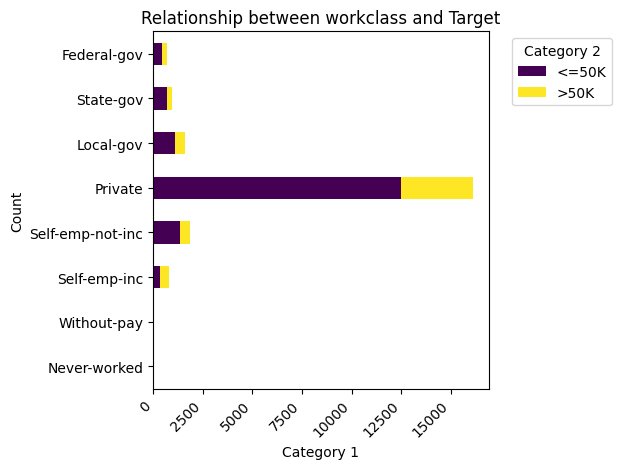

### Relationship between education and Target

<Figure size 1000x600 with 0 Axes>

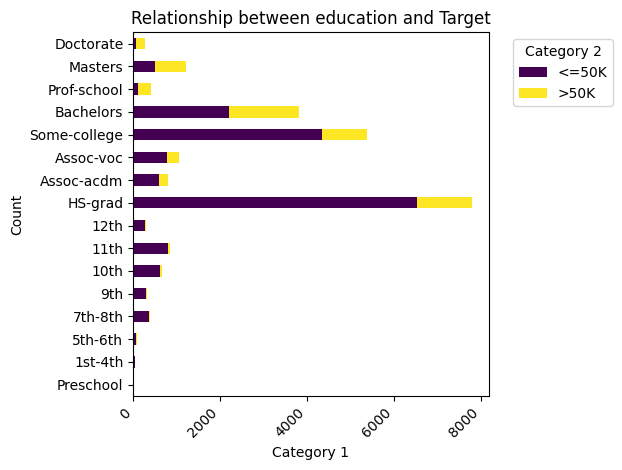

### Relationship between marital.status and Target

<Figure size 1000x600 with 0 Axes>

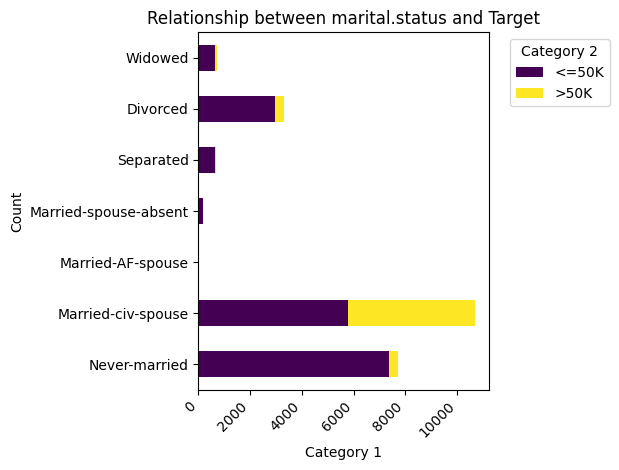

### Relationship between occupation and Target

<Figure size 1000x600 with 0 Axes>

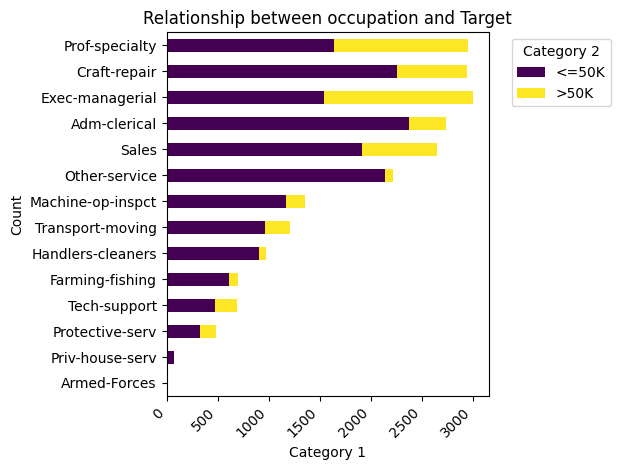

### Relationship between relationship and Target

<Figure size 1000x600 with 0 Axes>

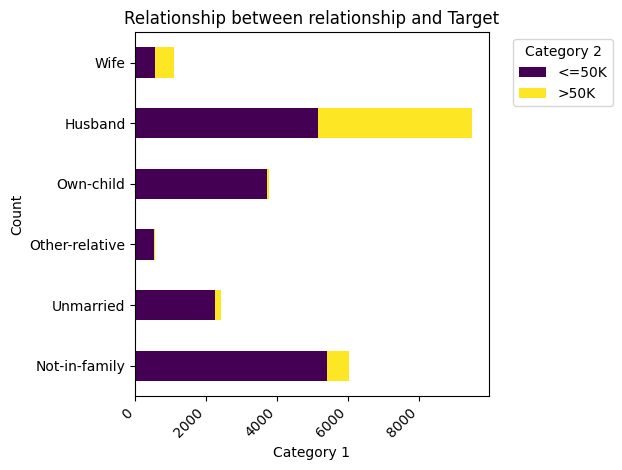

### Relationship between race and Target

<Figure size 1000x600 with 0 Axes>

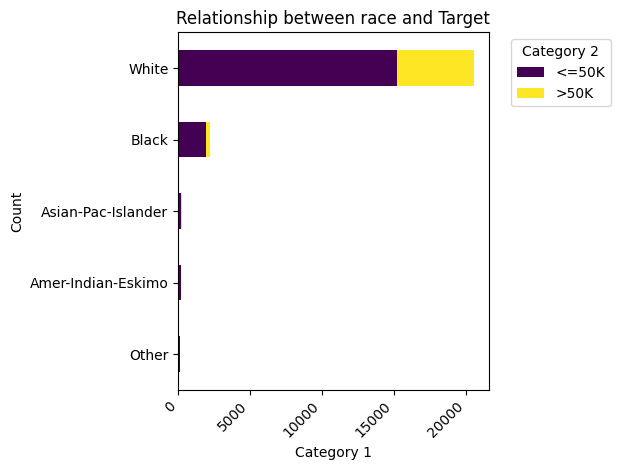

### Relationship between sex and Target

<Figure size 1000x600 with 0 Axes>

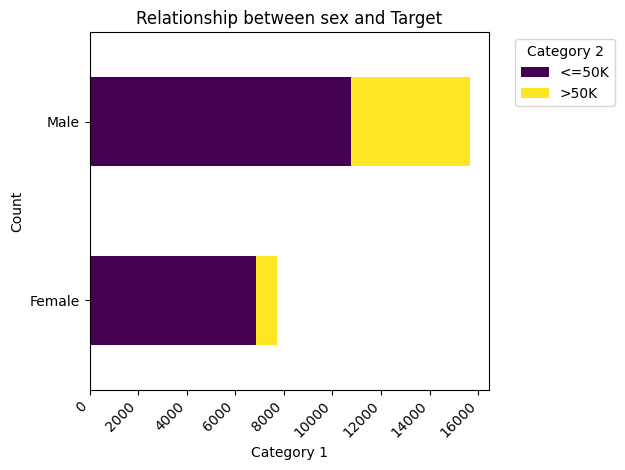

### Relationship between age and Target

<Figure size 1000x600 with 0 Axes>

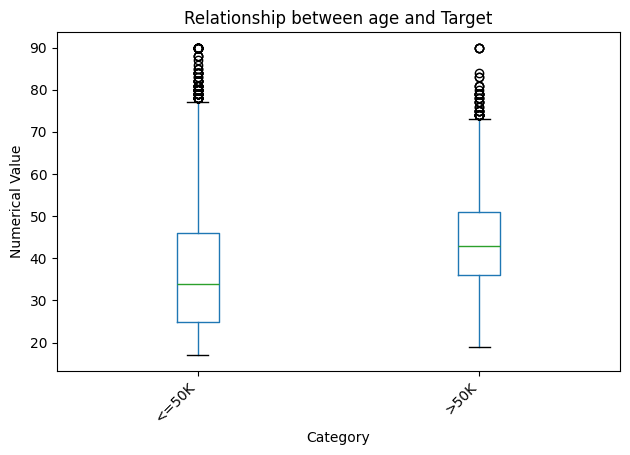

### Relationship between education.num and Target

<Figure size 1000x600 with 0 Axes>

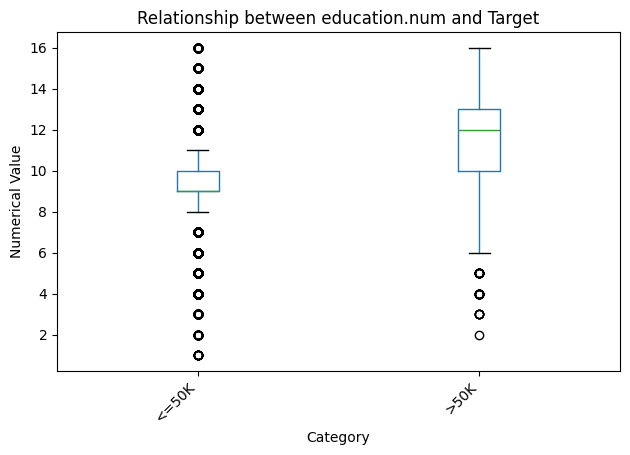

### Relationship between capital.gain and Target

<Figure size 1000x600 with 0 Axes>

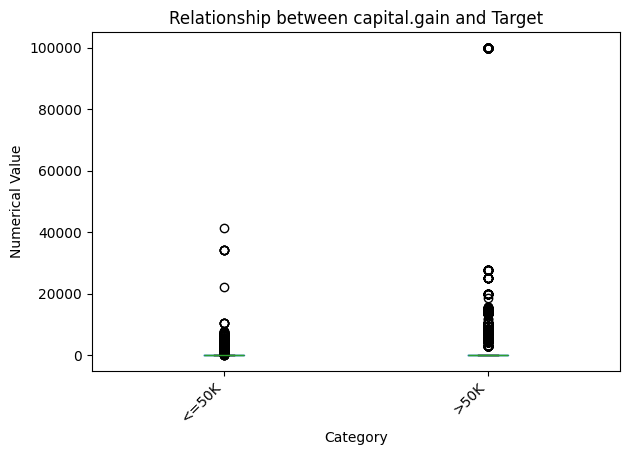

### Relationship between capital.loss and Target

<Figure size 1000x600 with 0 Axes>

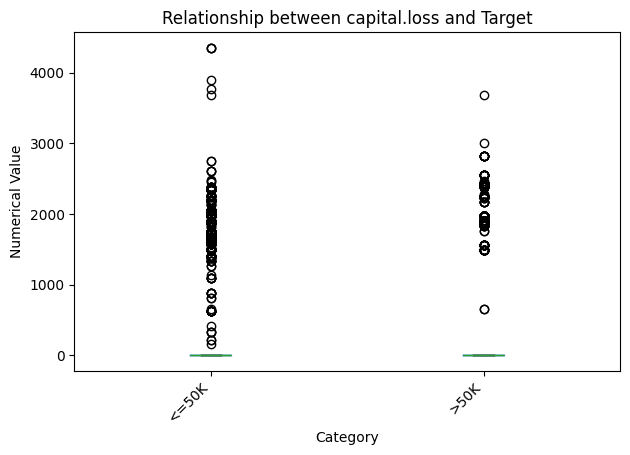

### Relationship between hours.per.week and Target

<Figure size 1000x600 with 0 Axes>

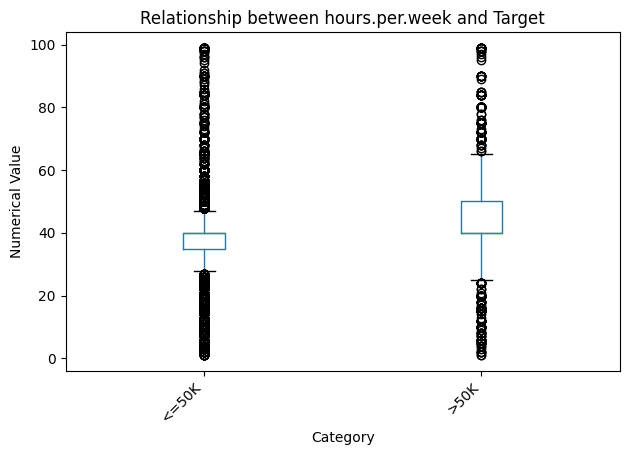

In [21]:
from projeto.eda import run_joint_EDA

run_joint_EDA(X_train, y_train)
# run_joint_EDA(X, y)

# Gravando os arquivos de dados

Por fim, vamos gravar em disco os arquivos de dados resultantes da nossa análise, isso é fundamental!

In [22]:
from projeto.dataset import save_processed_datasets

save_processed_datasets(
    X=X,
    y=y,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    base_path=base_path,
)

Responda: o que aconteceria se ao invés de gravar estes arquivos, fizéssemos a leitura do arquivo original e uma simples separação treino-teste no *notebook* de modelagem, sem maiores cuidados?

***Resposta***:

Ao ter features irrelevantes com falta de dados ou dados incorretos/pouca variação, faria o modelo se tornar enviesado e instável, obtendo predições que poderiam causar overfitting/underfitting e/ou imprecisos/incorretos

Além de também não saber quais features o modelo teria que priorizar ao fazer a predição, um exemplo seria se um dos fatores decisivos do modelo fosse o 'native-country', ao ter essa feature como um fator decisivo, o modelo desconsideraria features com maior relevância ao target e acabaria por causar overfitting devido ao fato de que maioria dos dados do 'native-country' são 'United-States'